# The Relationship between SAT Scores and Ethnicity - A NYC Study

SAT scores are predominantly used in US to a judge a student's math, reading and writing skills. Universities use these scores to judge whether the students that applied to their university will be a good fit. The higher the SAT score, the better chance a student has to enter a top notch university. 

The following study uses data about average SAT scores for NYC public school from NYC open data. This data was gathered for the 2014-2015 school year. The data set includes information about school name, zipcode level characteristics, average SAT scores for math, reading and writing, as well as percentage of different ethnicities in the school and the percentage of students taking SAT in that school. The important variables for this study are average SAT scores in math, reading and writing for each school. As well as the percentage of different ethnicities; namely, White, Black, Hispanic and Asian in the school.

The aim of this study is to analyze the relation between a different ethnicities and the average Math SAT scores, Reading and Writing SAT scores of NYC public schools through key summary statistics and graphs of the important vairbales. 

For the purpose of this report, all NaN values have been removed as they had missing information on the important variables.The total number of observations decreased from 435 to 374. The value of 0 is not treated as NaN because 0 signifies that a certain school had 0% a certain ethnicity. The data has been thoroughly cleaned to remove any '%' signs for the purpose of analysis.

In [1]:
import random
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
nyc_hs = pd.read_csv(r"C:\Users\anusha\Desktop\eco225\scores.csv")
nyc_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    435 non-null    object 
 1   School Name                  435 non-null    object 
 2   Borough                      435 non-null    object 
 3   Building Code                435 non-null    object 
 4   Street Address               435 non-null    object 
 5   City                         435 non-null    object 
 6   State                        435 non-null    object 
 7   Zip Code                     435 non-null    int64  
 8   Latitude                     435 non-null    float64
 9   Longitude                    435 non-null    float64
 10  Phone Number                 435 non-null    object 
 11  Start Time                   431 non-null    object 
 12  End Time                     431 non-null    object 
 13  Student Enrollment  

In [3]:
pd.DataFrame(nyc_hs)

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,...,4:10 PM,381.0,2.1%,49.1%,43.6%,4.2%,372.0,362.0,352.0,44.6%
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:30 PM,368.0,14.7%,46.7%,30.2%,3.5%,357.0,381.0,376.0,38.5%
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:04 PM,683.0,10.7%,53.2%,29.1%,6.0%,427.0,430.0,423.0,76.6%
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,4:20 PM,397.0,3.8%,52.6%,33.5%,5.0%,399.0,403.0,405.0,46.5%


In [4]:
nyc_hs_new = nyc_hs.dropna()
nyc_hs_new = pd.DataFrame(nyc_hs_new)
nyc_hs_new

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,...,4:10 PM,381.0,2.1%,49.1%,43.6%,4.2%,372.0,362.0,352.0,44.6%
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:30 PM,368.0,14.7%,46.7%,30.2%,3.5%,357.0,381.0,376.0,38.5%
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:04 PM,683.0,10.7%,53.2%,29.1%,6.0%,427.0,430.0,423.0,76.6%
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,4:20 PM,397.0,3.8%,52.6%,33.5%,5.0%,399.0,403.0,405.0,46.5%


In [5]:
%%time
white = nyc_hs_new["Percent_White_str"] = nyc_hs_new["Percent White"].str.replace("%", "")

black = nyc_hs_new["Percent_Black_str"] = nyc_hs_new["Percent Black"].str.replace("%", "")

hispanic = nyc_hs_new["Percent_Hispanic_str"] = nyc_hs_new["Percent Hispanic"].str.replace("%", "")

asian = nyc_hs_new["Percent_Asian_str"] = nyc_hs_new["Percent Asian"].str.replace("%", "")

Wall time: 14.4 ms


In [6]:
nyc_hs_new["WhitePercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_White_str"])
white_tonumeric = nyc_hs_new["WhitePercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_White_str"])

nyc_hs_new["BlackPercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_Black_str"])
white_tonumeric = nyc_hs_new["BlackPercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_Black_str"])

nyc_hs_new["HispanicPercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_Hispanic_str"])
white_tonumeric = nyc_hs_new["HispanicPercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_Hispanic_str"])

nyc_hs_new["AsianPercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_Asian_str"])
white_tonumeric = nyc_hs_new["AsianPercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_Asian_str"])

# Summary of Key Variables

In [8]:
Avg_SAT_score = nyc_hs_new[["Average Score (SAT Math)", "Average Score (SAT Reading)", "Average Score (SAT Writing)"]]
Avg_SAT_score = pd.DataFrame(Avg_SAT_score)
Avg_SAT_score
Avg_SAT_score.describe()

,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing)
count,374.000000,374.000000,374.000000
mean,432.719251,424.342246,418.286096
std,71.916833,61.884529,64.548388
min,317.000000,302.000000,284.000000
25%,386.000000,386.000000,382.000000
50%,414.000000,412.500000,402.500000
75%,457.250000,444.500000,436.000000
max,754.000000,697.000000,693.000000


These are the summary statistics for Average SAT scores. Some interesting points to note are that the maximum score for Math is higher than Reading and Writing. However, the mean scores are almost in the same of 415 to 435. The minimum for Writing is the lowest. Generally, students do better in Math and worse in Writing. For the purpose of this report we will focus on Average SAT Math and Writing Score and see if there is any correlation between different ethnicities and the average scores.

In [10]:
ethnicities = nyc_hs_new[["WhitePercent_numeric", "BlackPercent_numeric", "HispanicPercent_numeric","AsianPercent_numeric" ]]
ethnicities = pd.DataFrame(ethnicities)
ethnicities
ethnicities.describe()

,WhitePercent_numeric,BlackPercent_numeric,HispanicPercent_numeric,AsianPercent_numeric
count,374.000000,374.000000,374.000000,374.000000
mean,8.524599,35.387166,43.929679,10.412567
std,13.359205,25.367159,24.495584,14.400556
min,0.000000,0.000000,2.600000,0.000000
25%,1.300000,16.400000,20.825000,1.600000
50%,2.600000,28.750000,45.300000,4.200000
75%,9.375000,50.100000,63.375000,11.150000
max,79.900000,91.200000,100.000000,88.900000


These are the summary statistics for various ethnicities in the NYC public schools. Some interesting points to note are that some schools 0% of White, Black and Asian ethnicities and some schools have 100% Hispanic ethnicity. The mean varies a lot, schools have around 8.5% White and the mean for Hispanic ethnicity is 44%.

# Visual Summary of the Data

(array([ 2.,  2.,  1.,  6.,  8., 21., 26., 32., 39., 28., 22., 28., 19.,
        18., 18., 10.,  8.,  8., 10.,  9., 10.,  5.,  7.,  5.,  1.,  1.,
         1.,  3.,  3.,  1.,  3.,  4.,  0.,  1.,  0.,  2.,  2.,  1.,  1.,
         0.,  1.,  3.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([317.  , 325.74, 334.48, 343.22, 351.96, 360.7 , 369.44, 378.18,
        386.92, 395.66, 404.4 , 413.14, 421.88, 430.62, 439.36, 448.1 ,
        456.84, 465.58, 474.32, 483.06, 491.8 , 500.54, 509.28, 518.02,
        526.76, 535.5 , 544.24, 552.98, 561.72, 570.46, 579.2 , 587.94,
        596.68, 605.42, 614.16, 622.9 , 631.64, 640.38, 649.12, 657.86,
        666.6 , 675.34, 684.08, 692.82, 701.56, 710.3 , 719.04, 727.78,
        736.52, 745.26, 754.  ]),
 <a list of 50 Patch objects>)

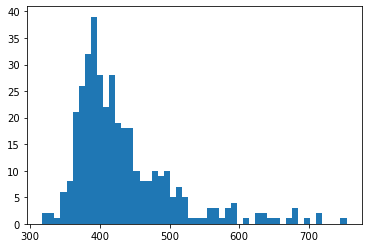

In [12]:
plt.hist(nyc_hs_new["Average Score (SAT Math)"], bins = 50)

(array([ 1.,  2.,  3.,  3.,  5.,  4.,  7.,  8., 17., 18., 31., 31., 22.,
        35., 30., 31., 21., 11., 15., 13.,  7.,  7.,  8.,  6.,  3.,  3.,
         3.,  1.,  3.,  2.,  1.,  3.,  3.,  0.,  0.,  1.,  2.,  2.,  2.,
         1.,  2.,  0.,  2.,  0.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([302. , 309.9, 317.8, 325.7, 333.6, 341.5, 349.4, 357.3, 365.2,
        373.1, 381. , 388.9, 396.8, 404.7, 412.6, 420.5, 428.4, 436.3,
        444.2, 452.1, 460. , 467.9, 475.8, 483.7, 491.6, 499.5, 507.4,
        515.3, 523.2, 531.1, 539. , 546.9, 554.8, 562.7, 570.6, 578.5,
        586.4, 594.3, 602.2, 610.1, 618. , 625.9, 633.8, 641.7, 649.6,
        657.5, 665.4, 673.3, 681.2, 689.1, 697. ]),
 <a list of 50 Patch objects>)

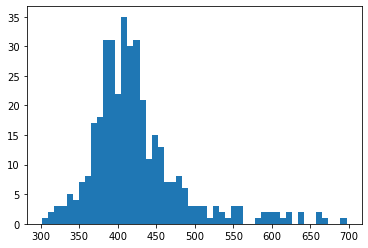

In [14]:
plt.hist(nyc_hs_new["Average Score (SAT Reading)"], bins = 50)

(array([ 2.,  1.,  0.,  3.,  5.,  2.,  2.,  5., 12., 17., 16., 31., 34.,
        39., 32., 25., 23., 23., 11., 13., 11.,  8.,  7.,  6.,  8.,  3.,
         2.,  2.,  3.,  2.,  2.,  4.,  1.,  1.,  2.,  0.,  0.,  1.,  4.,
         2.,  0.,  1.,  2.,  1.,  0.,  0.,  2.,  2.,  0.,  1.]),
 array([284.  , 292.18, 300.36, 308.54, 316.72, 324.9 , 333.08, 341.26,
        349.44, 357.62, 365.8 , 373.98, 382.16, 390.34, 398.52, 406.7 ,
        414.88, 423.06, 431.24, 439.42, 447.6 , 455.78, 463.96, 472.14,
        480.32, 488.5 , 496.68, 504.86, 513.04, 521.22, 529.4 , 537.58,
        545.76, 553.94, 562.12, 570.3 , 578.48, 586.66, 594.84, 603.02,
        611.2 , 619.38, 627.56, 635.74, 643.92, 652.1 , 660.28, 668.46,
        676.64, 684.82, 693.  ]),
 <a list of 50 Patch objects>)

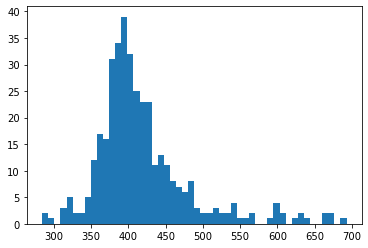

In [16]:
plt.hist(nyc_hs_new["Average Score (SAT Writing)"], bins = 50)

(array([120.,  88.,  40.,  14.,  13.,   8.,  10.,   4.,   8.,   6.,   2.,
          7.,   7.,   4.,   4.,   0.,   3.,   4.,   0.,   2.,   1.,   4.,
          3.,   0.,   1.,   0.,   2.,   2.,   3.,   1.,   0.,   3.,   3.,
          1.,   1.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.   ,  1.598,  3.196,  4.794,  6.392,  7.99 ,  9.588, 11.186,
        12.784, 14.382, 15.98 , 17.578, 19.176, 20.774, 22.372, 23.97 ,
        25.568, 27.166, 28.764, 30.362, 31.96 , 33.558, 35.156, 36.754,
        38.352, 39.95 , 41.548, 43.146, 44.744, 46.342, 47.94 , 49.538,
        51.136, 52.734, 54.332, 55.93 , 57.528, 59.126, 60.724, 62.322,
        63.92 , 65.518, 67.116, 68.714, 70.312, 71.91 , 73.508, 75.106,
        76.704, 78.302, 79.9  ]),
 <a list of 50 Patch objects>)

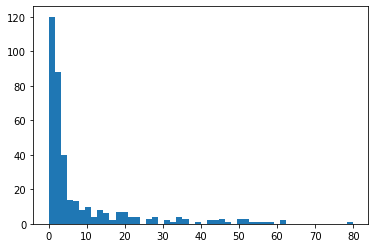

In [17]:
plt.hist(nyc_hs_new["WhitePercent_numeric"], bins = 50)

(array([10.,  7., 15.,  8., 16.,  7., 10., 13.,  9., 10.,  8., 13., 16.,
        16., 12., 21., 18., 10., 10., 10.,  8.,  9.,  3.,  5.,  5.,  6.,
         4.,  3.,  8.,  3.,  2.,  1.,  2.,  3.,  4.,  0.,  2.,  3.,  6.,
         6.,  5.,  4.,  2.,  4.,  7.,  7.,  7.,  6.,  3.,  7.]),
 array([ 0.   ,  1.824,  3.648,  5.472,  7.296,  9.12 , 10.944, 12.768,
        14.592, 16.416, 18.24 , 20.064, 21.888, 23.712, 25.536, 27.36 ,
        29.184, 31.008, 32.832, 34.656, 36.48 , 38.304, 40.128, 41.952,
        43.776, 45.6  , 47.424, 49.248, 51.072, 52.896, 54.72 , 56.544,
        58.368, 60.192, 62.016, 63.84 , 65.664, 67.488, 69.312, 71.136,
        72.96 , 74.784, 76.608, 78.432, 80.256, 82.08 , 83.904, 85.728,
        87.552, 89.376, 91.2  ]),
 <a list of 50 Patch objects>)

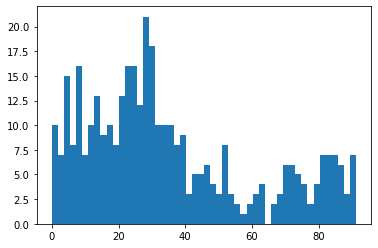

In [18]:
plt.hist(nyc_hs_new["BlackPercent_numeric"], bins = 50)

(array([ 2.,  8.,  6., 16., 13., 10., 10.,  8., 16., 11., 13.,  6., 10.,
         8.,  3.,  3.,  5.,  5., 10., 11.,  7.,  9.,  5.,  9.,  6.,  6.,
        12., 14., 10., 16., 10., 11.,  9., 13., 13., 10.,  5.,  3.,  9.,
         3.,  2.,  3.,  2.,  0.,  1.,  3.,  1.,  1.,  0.,  7.]),
 array([  2.6  ,   4.548,   6.496,   8.444,  10.392,  12.34 ,  14.288,
         16.236,  18.184,  20.132,  22.08 ,  24.028,  25.976,  27.924,
         29.872,  31.82 ,  33.768,  35.716,  37.664,  39.612,  41.56 ,
         43.508,  45.456,  47.404,  49.352,  51.3  ,  53.248,  55.196,
         57.144,  59.092,  61.04 ,  62.988,  64.936,  66.884,  68.832,
         70.78 ,  72.728,  74.676,  76.624,  78.572,  80.52 ,  82.468,
         84.416,  86.364,  88.312,  90.26 ,  92.208,  94.156,  96.104,
         98.052, 100.   ]),
 <a list of 50 Patch objects>)

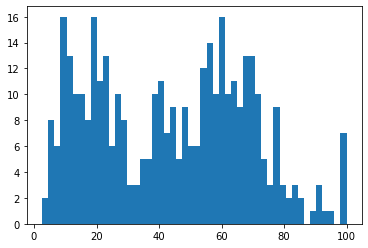

In [19]:
plt.hist(nyc_hs_new["HispanicPercent_numeric"], bins = 50)

(array([102.,  66.,  39.,  35.,  22.,  15.,   4.,   5.,   7.,   4.,   7.,
          3.,   6.,   3.,   2.,   5.,   7.,   6.,   1.,   4.,   4.,   5.,
          5.,   3.,   2.,   0.,   1.,   1.,   0.,   0.,   2.,   1.,   1.,
          0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.   ,  1.778,  3.556,  5.334,  7.112,  8.89 , 10.668, 12.446,
        14.224, 16.002, 17.78 , 19.558, 21.336, 23.114, 24.892, 26.67 ,
        28.448, 30.226, 32.004, 33.782, 35.56 , 37.338, 39.116, 40.894,
        42.672, 44.45 , 46.228, 48.006, 49.784, 51.562, 53.34 , 55.118,
        56.896, 58.674, 60.452, 62.23 , 64.008, 65.786, 67.564, 69.342,
        71.12 , 72.898, 74.676, 76.454, 78.232, 80.01 , 81.788, 83.566,
        85.344, 87.122, 88.9  ]),
 <a list of 50 Patch objects>)

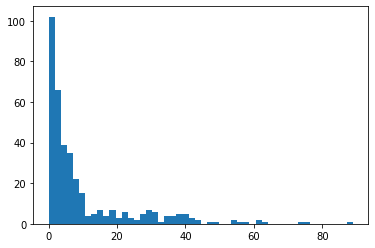

In [23]:
plt.hist(nyc_hs_new["AsianPercent_numeric"], bins = 50)

In [26]:
w = nyc_hs_new["WhitePercent_numeric"]
b = nyc_hs_new["BlackPercent_numeric"]
h = nyc_hs_new["HispanicPercent_numeric"]
a = nyc_hs_new["AsianPercent_numeric"]

In [27]:
y1 = nyc_hs_new["Average Score (SAT Math)"]
y2 = nyc_hs_new["Average Score (SAT Reading)"]
y3 = nyc_hs_new["Average Score (SAT Writing)"]

Text(0.5, 1.0, 'Scatter Plot of Percent of White and Math Avg SAT Score')

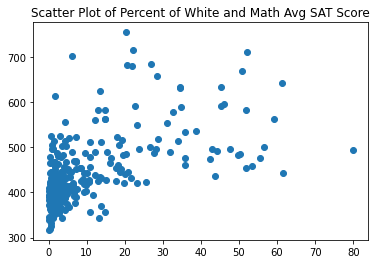

In [28]:
plt.scatter(w, y1)
plt.title("Scatter Plot of Percent of White and Math Avg SAT Score")
#plt.xlabel()
#plt.ylabel()

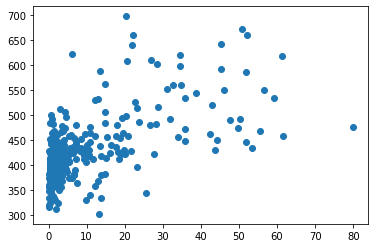

In [27]:
plt.scatter(w, y2)

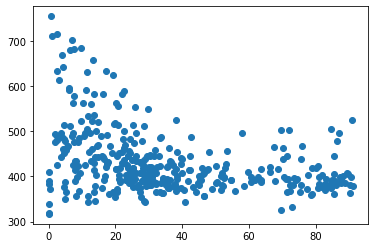

In [28]:
plt.scatter(b, y1)

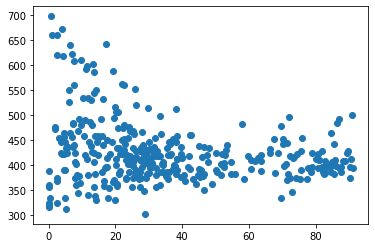

In [29]:
plt.scatter(b, y2)

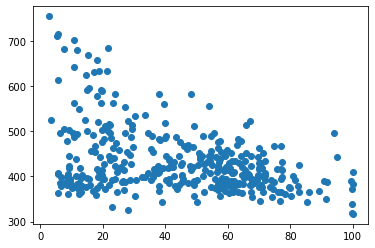

In [30]:
plt.scatter(h, y1)

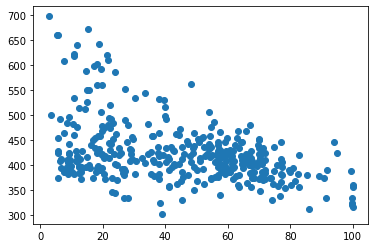

In [31]:
plt.scatter(h, y2)

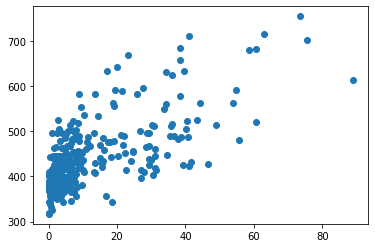

In [32]:
plt.scatter(a, y1)

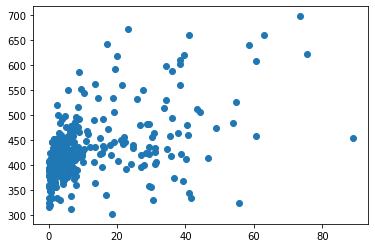

In [33]:
plt.scatter(a, y2)

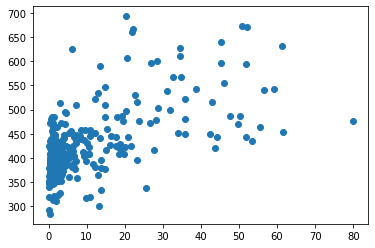

In [29]:
plt.scatter(w, y3)

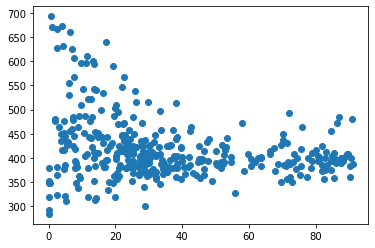

In [30]:
plt.scatter(b, y3)

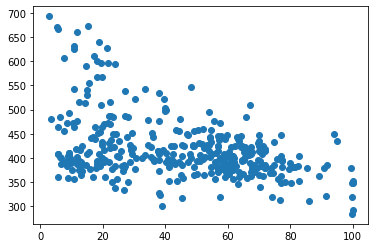

In [31]:
plt.scatter(h, y3)

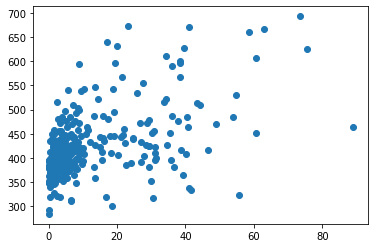

In [32]:
plt.scatter(a, y3)